In [2]:
from argparse import Namespace
from typing import Tuple
import sys

import torch
from datasets import get_dataset
from utils.tb_logger import *
from utils.loggers import *
from utils.status import ProgressBar
import numpy as np
from datasets.seq_cifar10 import SequentialCIFAR10

/home/nikita.jain/continual_VLM/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
!pip install pytorch-lightning

  Using cached pytorch_lightning-2.2.4-py3-none-any.whl.metadata (21 kB)
  Using cached torchmetrics-1.4.0.post0-py3-none-any.whl.metadata (19 kB)
  Using cached lightning_utilities-0.11.2-py3-none-any.whl.metadata (4.7 kB)
  Using cached frozenlist-1.4.1-cp311-cp311-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (12 kB)
  Using cached yarl-1.9.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (31 kB)
Using cached pytorch_lightning-2.2.4-py3-none-any.whl (802 kB)
Using cached lightning_utilities-0.11.2-py3-none-any.whl (26 kB)
Using cached torchmetrics-1.4.0.post0-py3-none-any.whl (868 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 41.3 MB/s eta 0:00:00
Using cached aiosignal-1.3.1-py3-none-any.whl (7.6 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 13.7 MB/s eta 0:00:00
Using cached frozenlist-1.4.1-cp311-cp311-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.

In [1]:
!pip install git+https://github.com/openai/CLIP.git

  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-1wrld5v2
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-1wrld5v2
  Resolved https://github.com/openai/CLIP.git to commit a1d071733d7111c9c014f024669f959182114e33
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 785.0/785.0 kB 56.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.2/779.2 MB 6.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
from models.vqa_er import VQAER
args = {'buffer_size': 200,
        'minibatch_size': 1,
        'loss_type': 'l2',
        'model': 'vqa_er',
        'lr': 0.0001,
        'dataset_dir': '/home/nikita.jain/Datasets',
        'validation': True,
        'batch_size': 1,
    }


ns = Namespace(**args)
dataset = SequentialCIFAR10(ns)

backbone = dataset.get_backbone()
loss = dataset.get_loss()
conf = {
'frozen_text_encoder': True,
}

#backbone.load_state_dict(torch.load('results/results/class-il/seq-cifar10/vqa_er/vqa/model_task5.ph'))

cl_model = VQAER(backbone, loss, ns, dataset.get_transform(), conf)

In [13]:
torch.load('results/results/class-il/seq-cifar10/vqa_er/vqa/model_task5.ph')['net']

{'task': 5,
 'net': OrderedDict([('conv1.weight',
               tensor([[[[-0.0940,  0.2258, -0.1806],
                         [ 0.0987,  0.0792,  0.2569],
                         [ 0.0040,  0.3189,  0.1510]],
               
                        [[ 0.0778,  0.1110, -0.0875],
                         [ 0.2030,  0.3126,  0.0575],
                         [ 0.0824,  0.2222,  0.2839]],
               
                        [[ 0.1659,  0.3289,  0.1643],
                         [ 0.1789,  0.6575,  0.6002],
                         [ 0.4873,  0.7013,  0.6355]]],
               
               
                       [[[-0.0891, -0.1611, -0.5020],
                         [-0.2706, -0.2820, -0.1236],
                         [ 0.0051,  0.0490, -0.0876]],
               
                        [[-0.0749, -0.1162, -0.2013],
                         [ 0.2175,  0.2109, -0.0318],
                         [ 0.3516,  0.1744,  0.1978]],
               
                        [[ 0.7924,  0.

In [4]:
cl_model.model.image_encoder.load_state_dict(torch.load('results/results/class-il/seq-cifar10/vqa_er/vqa/model_task1.ph')['net'])

<All keys matched successfully>

In [5]:
train_loader, test_loader = dataset.get_data_loaders()

In [5]:
IMAGE_TOKEN = "<image>"

def get_tokens(model, inputs):
    I = model.model.tokenizer.convert_tokens_to_ids(IMAGE_TOKEN)
    # input_ids = [I for i in range(2)] + inputs['input_ids']
    # attention_mask = [1 for i in range(2)] + inputs['attention_mask']
    input_ids = [I for i in range(2)] 
    attention_mask = [1 for i in range(2)]
    return {
        'input_ids': torch.tensor(input_ids).unsqueeze(0),
        'attention_mask': torch.tensor(attention_mask).unsqueeze(0),
    }


default_qstn = cl_model.model.tokenizer('What is the object in the image?')
tokens = get_tokens(cl_model, default_qstn)
image_token_mask = tokens['input_ids'] == cl_model.model.tokenizer.convert_tokens_to_ids(IMAGE_TOKEN)

In [63]:
cl_model.model.tokenizer.add_special_tokens({'additional_special_tokens': ["<sep>"]})
toks1 = cl_model.model.tokenizer(["This is an image of aeroplane", "This is an image of automobile", "This is an image of automobile(car/truck)"], padding=True)
# toks1 = cl_model.model.tokenizer(["This is an image of", "This is an image of"], padding=True)

In [64]:
toks1['input_ids']

[[2, 713, 16, 41, 2274, 9, 16482, 25934, 1728, 1, 1, 1, 1],
 [2, 713, 16, 41, 2274, 9, 19953, 1, 1, 1, 1, 1, 1],
 [2, 713, 16, 41, 2274, 9, 19953, 1640, 5901, 73, 90, 20777, 43]]

In [60]:
toks1['input_ids'][0].index(cl_model.model.tokenizer.convert_tokens_to_ids("<sep>"))

7

In [37]:
cl_model.model.tokenizer.add_special_tokens({'additional_special_tokens': ["<sep>"]})

cl_model.model.tokenizer("This is an image of <sep> aeroplane")['input_ids']

{'input_ids': [2, 713, 16, 41, 2274, 9, 1437, 50266, 16482, 25934, 1728, 1437, 1], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [49]:
toks = cl_model.model.tokenizer("This is an image of <sep> automobile")['input_ids'].index(cl_model.model.tokenizer("<sep>").input_ids[1])

7

In [46]:
cl_model.model.tokenizer("<sep>").input_ids[1]

50266

In [9]:
kwargs = {
    'pixel_values': train_loader.dataset[4][0].unsqueeze(0),
    'input_ids': tokens['input_ids'],
    'attention_mask': tokens['attention_mask'],
    'image_token_mask': image_token_mask[:, :2],
}

output = cl_model.check_model(**kwargs)

In [13]:
decoded = cl_model.model.tokenizer.batch_decode(
    output.sequences,
    skip_special_tokens=True,
    clean_up_tokenization_spaces=False,
)

In [59]:
with torch.no_grad():
    cl_model.model.image_encoder.eval()
    print(cl_model.model.image_encoder(train_loader.dataset[1][0].unsqueeze(0)))

tensor([[ 7.9092, 13.4097, -1.6448, -2.3302, -2.2535, -2.6834, -2.5182, -3.9176,
         -2.8563, -2.4598]])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9894737..2.1166348].


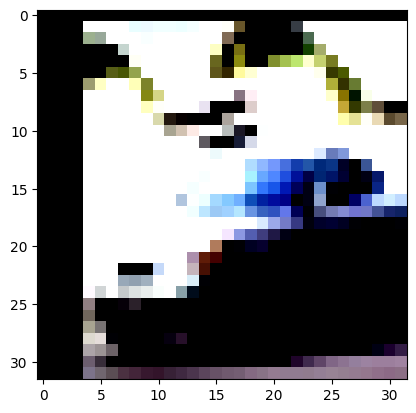

</s></s>

The first time,

The first time, first,

The first


In [14]:
import matplotlib.pyplot as plt


plt.imshow(train_loader.dataset[4][0].permute(1, 2, 0))
plt.show()
print(decoded[0])

In [48]:
test_loader.dataset

In [26]:
print(decoded[0])

I'm sorry, but I don't understand what you're trying to say.
I
